#SARIMAX MODEL


Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, or SARIMAX, is an extension of the ARIMA class of models. Intuitively, ARIMA models compose 2 parts: the autoregressive term (AR) and the moving-average term (MA).

Here We have applied Sarimax model with monthly seasonality on Warangal District at Mee-Seva univariate AQI data provided by NASSCOM.


In [171]:
## Included all necessary Header files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [172]:
#Preprocessing the data

df = pd.read_excel("AQI1.xlsx")

df.index = pd.to_datetime(df["Month"])
df.drop(columns="Month",inplace=True)

df['Mee-Seva, Warangal'] = pd.to_numeric(df['Mee-Seva, Warangal'],errors='coerce')

# EDA

In [173]:
print(df.dtypes)
print(df.isna().sum())

Nizamabad             object
Adilabad              object
Kuda, warangal         int64
Mee-Seva, Warangal     int64
Khammam               object
Karimnagar             int64
dtype: object
Nizamabad             0
Adilabad              0
Kuda, warangal        0
Mee-Seva, Warangal    0
Khammam               0
Karimnagar            0
dtype: int64


<AxesSubplot:xlabel='Month'>

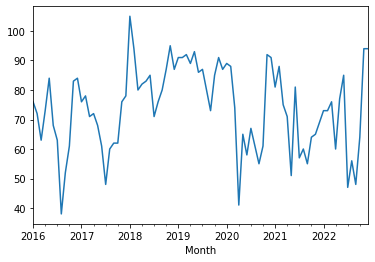

In [174]:
df["Mee-Seva, Warangal"].plot()

In [175]:
df['Mee-Seva, Warangal'] = df['Mee-Seva, Warangal'].interpolate(method="time")

<AxesSubplot:xlabel='Month'>

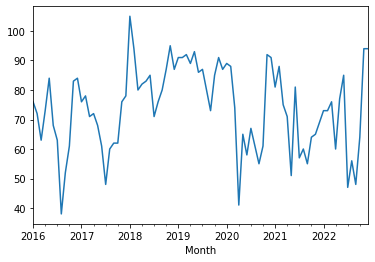

In [176]:
df["Mee-Seva, Warangal"].plot()

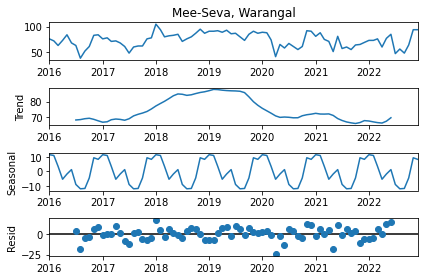

In [177]:
decompose_data = seasonal_decompose(df["Mee-Seva, Warangal"], model="additive")
decompose_data.plot();

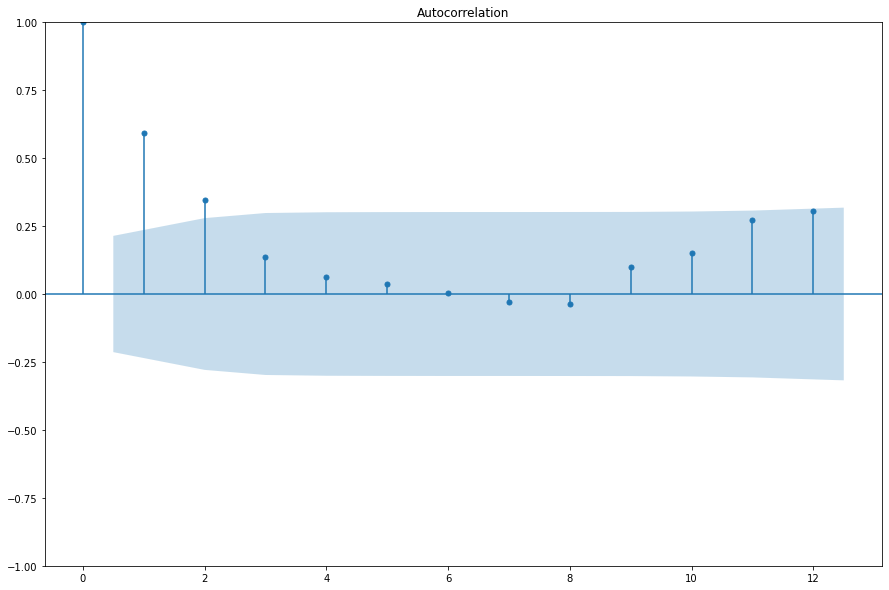

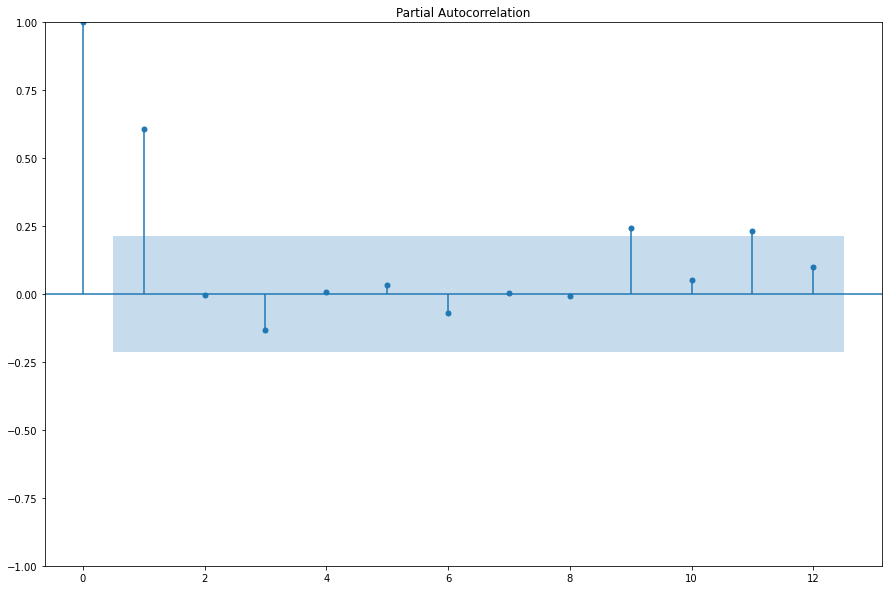

In [178]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
f_acf = plot_acf(df['Mee-Seva, Warangal'], lags=12)
f_pacf = plot_pacf(df['Mee-Seva, Warangal'], lags=12, method='ols')
f_acf.set_figheight(10)
f_acf.set_figwidth(15)
f_pacf.set_figheight(10)
f_pacf.set_figwidth(15)
plt.show()

# MODEL

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-179-e889ad786cac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['forecast']=results.predict(start=71,end=83,dynamic=True)


            Mee-Seva, Warangal   forecast
Month                                    
2022-01-01                  73  75.181637
2022-02-01                  73  74.821848
2022-03-01                  76  65.303534
2022-04-01                  60  58.156940
2022-05-01                  77  61.249247
2022-06-01                  85  61.826741
2022-07-01                  47  54.921522
2022-08-01                  56  52.345488
2022-09-01                  48  51.230777
2022-10-01                  64  58.608674
2022-11-01                  94  72.444692
2022-12-01                  94  71.803343


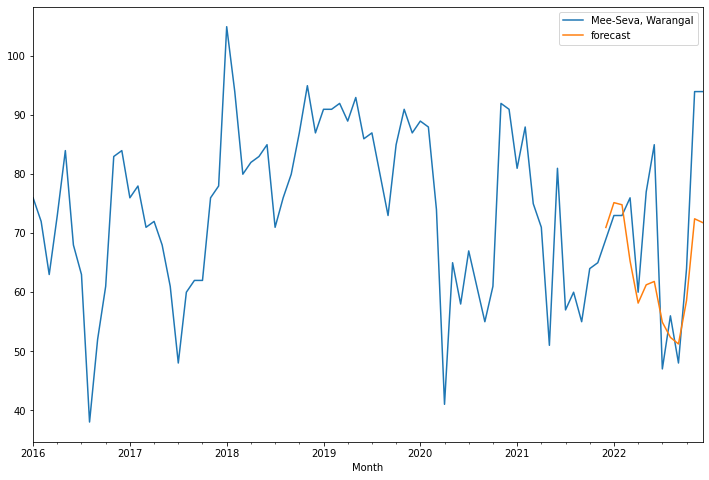

In [179]:
data = df[["Mee-Seva, Warangal"]]
model=sm.tsa.statespace.SARIMAX(df["Mee-Seva, Warangal"],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
data['forecast']=results.predict(start=71,end=83,dynamic=True)
data[['Mee-Seva, Warangal','forecast']].plot(figsize=(12,8))
print(data.tail(12))

<AxesSubplot:>

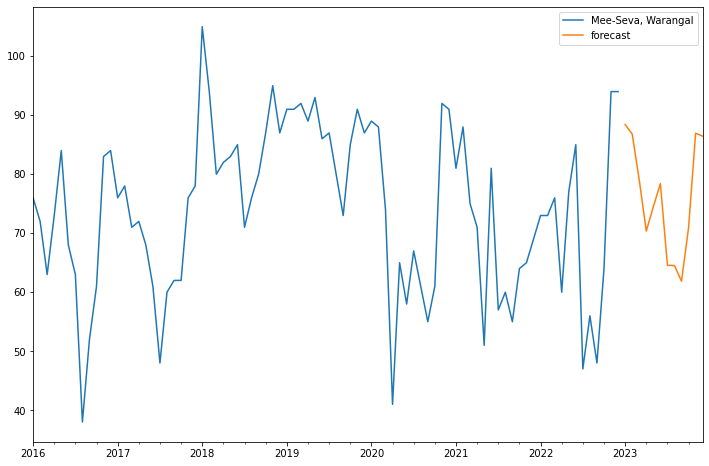

In [180]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(months=x)for x in range(1,13)]
pred_date=pd.DataFrame(index=pred_date,columns=data.columns)
df5 = pd.concat([data,pred_date])
df5['forecast'] = results.predict(start = 84, end = 95, dynamic= True)  
df5[['Mee-Seva, Warangal', 'forecast']].plot(figsize=(12, 8))

# ERROR CALCULATION

In [181]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
rmse = round(sqrt(mean_squared_error(df["Mee-Seva, Warangal"].iloc[-12:], data["forecast"].iloc[-12:])),2)
mae = round(mean_absolute_error(df["Mee-Seva, Warangal"].iloc[-12:], data["forecast"].iloc[-12:]),2)
mape = mean_absolute_percentage_error(df["Mee-Seva, Warangal"].iloc[-12:], data["forecast"].iloc[-12:])
print(f"RMSE : {rmse}")
print(f"MAE  : {mae}")
print(f"MAPE : {mape*100}%")

RMSE : 12.86
MAE  : 9.95
MAPE : 12.952338633436336%


The mean absolute percentage error is : 12.95%
Hence our accuracy is : 87.05% which is acceptable

In [182]:
df5["Mee-Seva, Warangal"][-12:]=df5["forecast"][-12:]
df_final = df5[["Mee-Seva, Warangal"]]

<ipython-input-182-524db6209b06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Mee-Seva, Warangal"][-12:]=df5["forecast"][-12:]


In [183]:
df_final.to_csv("Warangal_AQI_S.csv")